<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_6_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple linear regression

Consider the model function
$$
y=\alpha+\beta x
$$

$$
y_i=\alpha+\beta x_i+\epsilon_i
$$

Find $\min_{\alpha, \beta}Q(\alpha, \beta)$ where
$Q(\alpha, \beta)=\sum_{i=1}^n{\epsilon_i^2}=\sum_{i=1}^n{(y_i-\alpha-\beta x_i)^2}$

$$
\beta=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}=\frac{cov(x,y)}{var(x)}=\rho_{xy}\frac{s_y}{s_x}
$$

$$
\alpha=\bar{y}-\beta \bar{x}
$$
* $\bar{x}$ and $\bar{y}$ are the averages of $x_i$ and $y_i$;
* $\rho(x,y)$ are the sample correlation coefficient between $x$ and $y$;
* $s_x$ and $s_y$ are the uncorrected sample standard deviations of $x$ and $y$;
* $var$ and $cov$ are the sample variance and sample covariance.

The coefficient of determination ("R squared") is equal to $\rho_{xy}$.
$R^2$ is a statistic that will give some information about the goodness of fit of a model. In regression, the $R^2$ coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An $R^2$ of $1$ indicates that the regression predictions perfectly fit the data.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#Simple Linear Regression

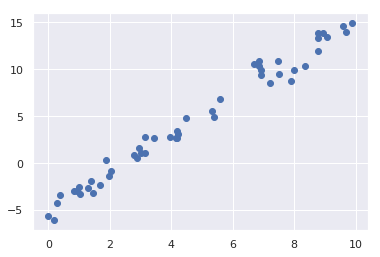

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

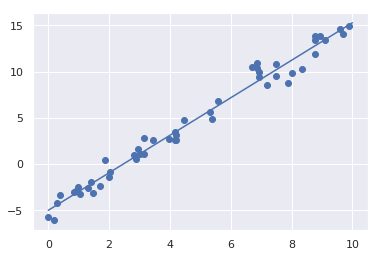

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [0]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


In [0]:
# fit with polynomial
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


#Basis Function Regression

##Polynomial basis functions

In [0]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [0]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

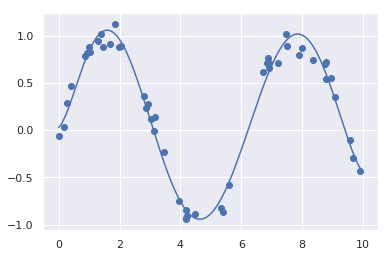

In [0]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

##Gaussian basis functions

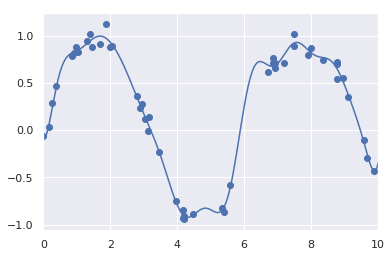

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""
  
  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self
  
  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

  
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

#Regularization

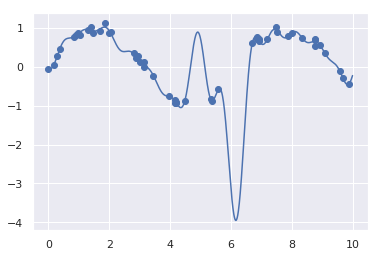

In [0]:
# overfitting
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

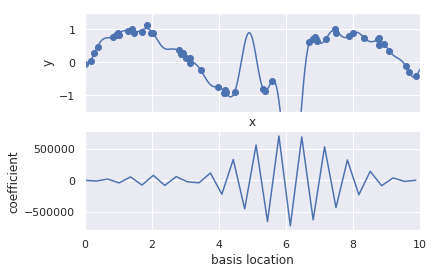

In [0]:
def basis_plot(model, title=None):
  fig, ax = plt.subplots(2, sharex=True)
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
  if title:
    ax[0].set_title(title)
  ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
  ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))
    
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

##Ridge regression ($L_2$ regularization)

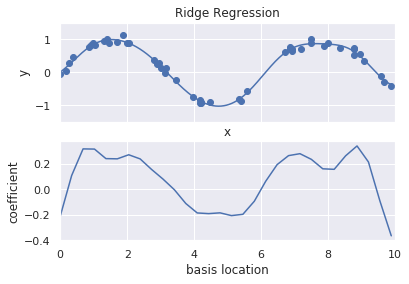

In [0]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

*  $\alpha \to 0$ --- original linear regression
*  $\alpha \to \infty$ --- regression totally suppressed
*  it can be computed very efficiently—at hardly more computational cost than the original linear regression model

##Lasso regularization ($L_1$)

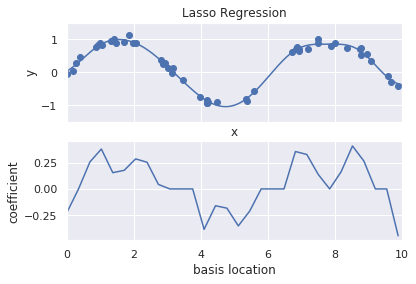

In [0]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, tol=0.01))
basis_plot(model, title='Lasso Regression')

#Example: Predicting Bicycle Traffic

In [0]:
# taken from
# https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail
# and
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_bridge.csv
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1658k  100 1658k    0     0  5133k      0 --:--:-- --:--:-- --:--:-- 5118k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  972k  100  972k    0     0  3668k      0 --:--:-- --:--:-- --:--:-- 3668k


In [0]:
import pandas as pd

counts = pd.read_csv('fremont_bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('fremont_weather.csv', index_col='DATE', parse_dates=True)

In [0]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [0]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [0]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

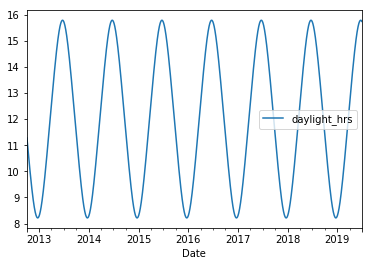

In [0]:
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude=47.61):
  """Compute the hours of daylight for the given date"""
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

In [0]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

daily['annual'] = (daily.index - daily.index[0]).days / 365

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,1.335,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,1.360,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,1.530,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,1.585,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,1.585,1,0.010959


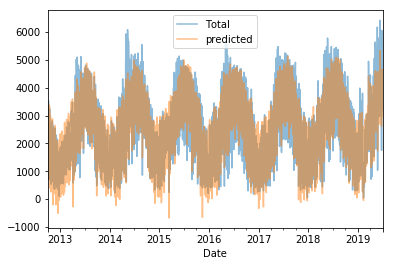

In [0]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5);

In [0]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              516.683173
Tue              685.292398
Wed              656.429235
Thu              457.207814
Fri              216.704833
Sat            -1161.040227
Sun            -1287.765725
holiday        -1145.268789
daylight_hrs     120.595855
PRCP           -7324.939159
dry day          488.622008
Temp (C)         720.057238
annual            49.713016
dtype: float64

In [0]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            517.0   65.0
Tue            685.0   64.0
Wed            656.0   62.0
Thu            457.0   64.0
Fri            217.0   62.0
Sat          -1161.0   62.0
Sun          -1288.0   62.0
holiday      -1145.0  149.0
daylight_hrs   121.0    7.0
PRCP         -7325.0  455.0
dry day        489.0   25.0
Temp (C)       720.0   32.0
annual          50.0    6.0
